In [32]:
!pip install -q tensorflow

In [33]:
import tensorflow as tf

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
data = load_breast_cancer()

In [36]:
type(data)

sklearn.utils.Bunch

In [37]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
data.data.shape

(569, 30)

In [39]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [40]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [41]:
data.target.shape

(569,)

In [42]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

print("Train Score: ", model.evaluate(X_train, Y_train))
print("Test  Score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9790
Train Score:  [0.09337974339723587, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9628
Test  Score:  [0.10062761604785919, 0.9627659320831299]


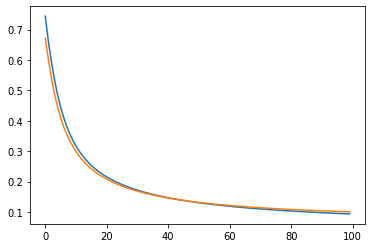

In [48]:
# Plot what is returned by the function
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

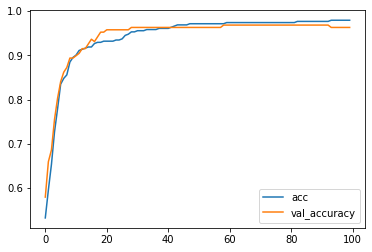

In [49]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

**Making Predictions**

In [50]:
P = model.predict(X_test)
print(P) # They are the output of the sigmoid, interpreted as probabilities p(Y = 1 | x)

[[9.8349267e-01]
 [9.9236619e-01]
 [1.4030933e-04]
 [9.1218716e-01]
 [1.3096631e-01]
 [9.9986279e-01]
 [9.6724439e-01]
 [9.6136022e-01]
 [1.8737137e-02]
 [3.6286712e-02]
 [6.9238186e-01]
 [6.9241315e-02]
 [5.4297356e-08]
 [4.3104154e-01]
 [1.7997563e-02]
 [9.8639107e-01]
 [9.9891537e-01]
 [8.8368446e-01]
 [9.9914426e-01]
 [9.9768615e-01]
 [9.5692372e-01]
 [9.5848525e-01]
 [8.7980330e-03]
 [9.8838580e-01]
 [9.4135165e-01]
 [9.7557741e-01]
 [9.9490047e-01]
 [9.4547498e-01]
 [6.2988913e-01]
 [1.2331734e-04]
 [4.7510862e-03]
 [9.5665717e-01]
 [3.2238662e-03]
 [3.5712123e-04]
 [9.9823296e-01]
 [9.9593425e-01]
 [9.3764216e-01]
 [9.9262524e-01]
 [8.3429968e-01]
 [8.9212507e-01]
 [1.1148840e-02]
 [9.9497092e-01]
 [9.5964026e-01]
 [8.2007581e-01]
 [9.8464674e-01]
 [9.9946141e-01]
 [2.1051982e-01]
 [9.9940622e-01]
 [9.9303102e-01]
 [7.2115064e-03]
 [9.9924439e-01]
 [9.7997612e-01]
 [7.0802277e-01]
 [9.9116957e-01]
 [3.2639819e-01]
 [3.3400893e-02]
 [9.9150825e-01]
 [6.9106180e-05]
 [9.8370063e-0

In [51]:
# Round to get actual predictions
# Note: Has to be flatten since the targets are size (N,) while the predictions are size (N, 1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.]


In [31]:
# Calculate the accuracy and compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == Y_test))
print("Evaluated output:", model.evaluate(X_test, Y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9894
Evaluated output: [0.0943121388554573, 0.9893617033958435]


In [52]:
# Lets now save our model to a file
model.save('linear_classifier.h5')

In [53]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K May 29 18:44 linear_classifier.h5
drwxr-xr-x 1 root root 4.0K May 17 13:39 sample_data


In [54]:
# Lets now load the model and see if it still works
# Load / Save only works if you Don't use the Input() layer explicitely
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linear_classifier.h5')
print(model.layers)
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9628


[0.10062761604785919, 0.9627659320831299]